A graph data structure is a collection of nodes that have data and are connected to other nodes.

Let's try to understand this through an example. On facebook, everything is a node. That includes User, Photo, Album, Event, Group, Page, Comment, Story, Video, Link, Note...anything that has data is a node.

More precisely, a graph is a data structure (V, E) that consists of

- A collection of vertices V
- A collection of edges E, represented as ordered pairs of vertices (u,v)

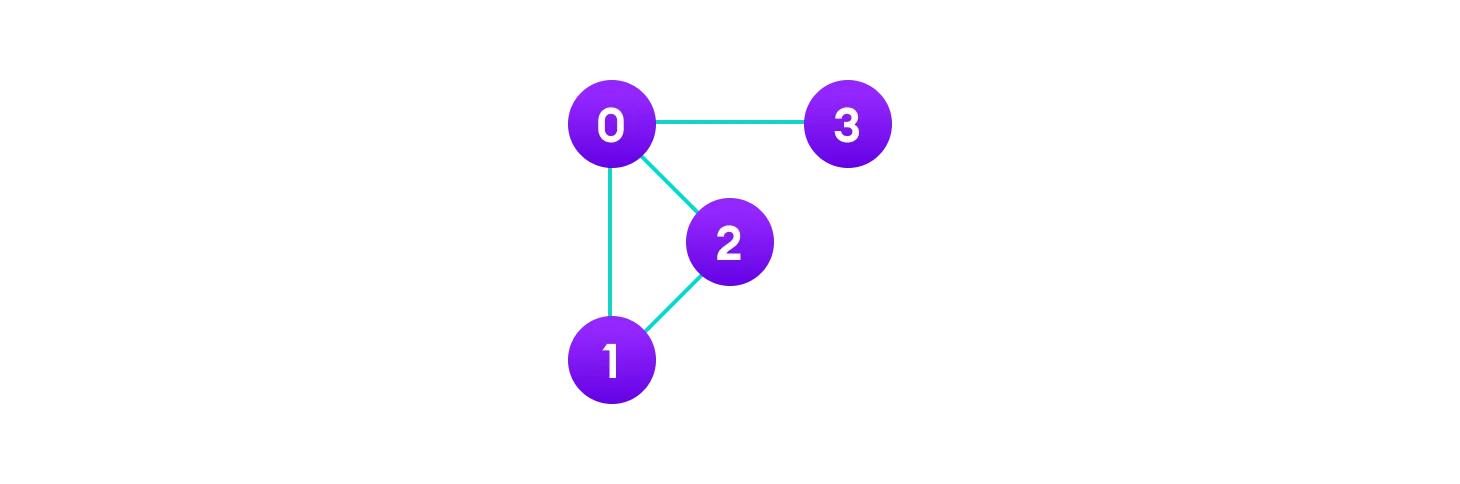

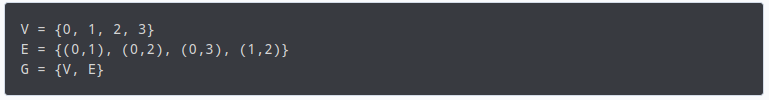

# GRAPH TERMINOLOGY

# Adjacency

A vertex is said to be adjacent to another vertex if there is an edge connecting them. Vertices 2 and 3 are not adjacent because there is no edge between them.


# Path

A sequence of edges that allows you to go from vertex A to vertex B is called a path. 0-1, 1-2 and 0-2 are paths from vertex 0 to vertex 2.

# Directed Graph

A graph in which an edge (u,v) doesn't necessarily mean that there is an edge (v, u) as well. The edges in such a graph are represented by arrows to show the direction of the edge.


# GRAPH REPRESENTATION

Graphs are commonly represented in two ways:



# 1. Adjacency Matrix

An adjacency matrix is a 2D array of V x V vertices. Each row and column represent a vertex.

If the value of any element a[i][j] is 1, it represents that there is an edge connecting vertex i and vertex j.

An adjacency matrix is a way of representing a graph as a matrix of booleans (0's and 1's). A finite graph can be represented in the form of a square matrix on a computer, where the boolean value of the matrix indicates if there is a direct path between two vertices.

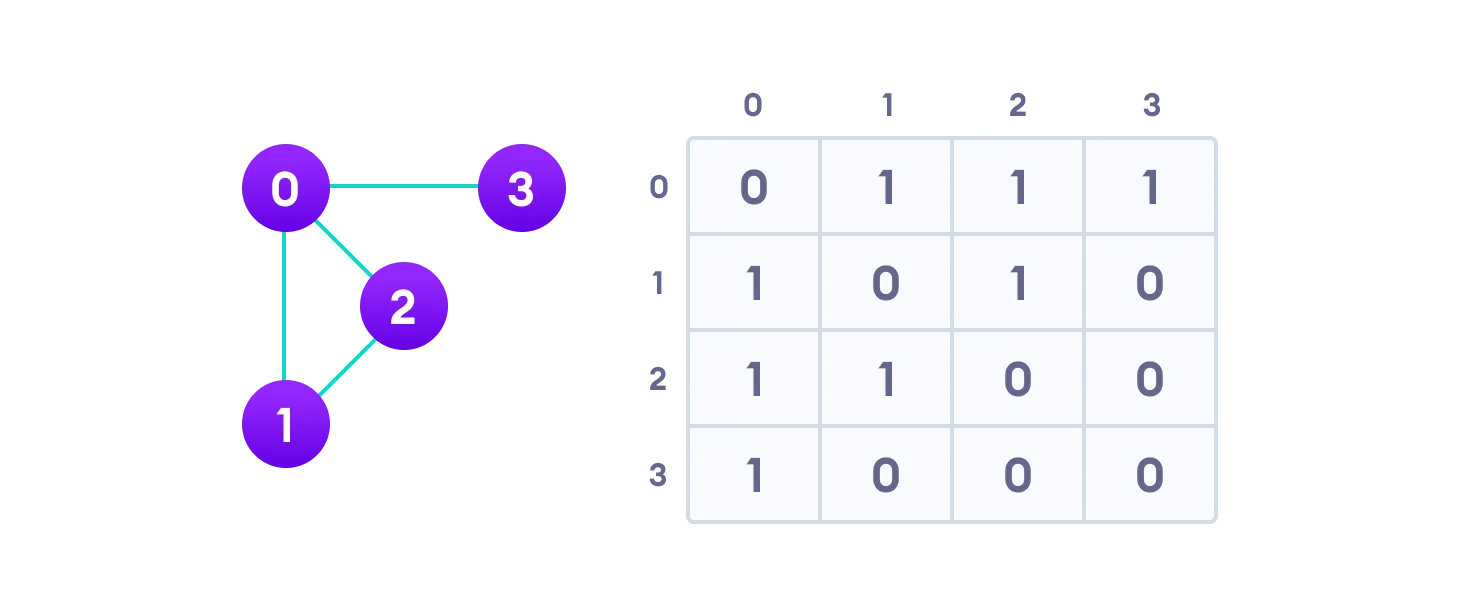

Pros of Adjacency Matrix: 
- The basic operations like adding an edge, removing an edge, and checking whether there is an edge from vertex i to vertex j are extremely time efficient, constant time operations.

Cons of Adjacency Matrix:
- The VxV space requirement of the adjacency matrix makes it a memory hog. Graphs out in the wild usually don't have too many connections and this is the major reason why adjacency lists are the better choice for most tasks.

# 2. Adjacency List

An adjacency list represents a graph as an array of linked lists. The index of the array represents a vertex and each element in its linked list represents the other vertices that form an edge with the vertex.

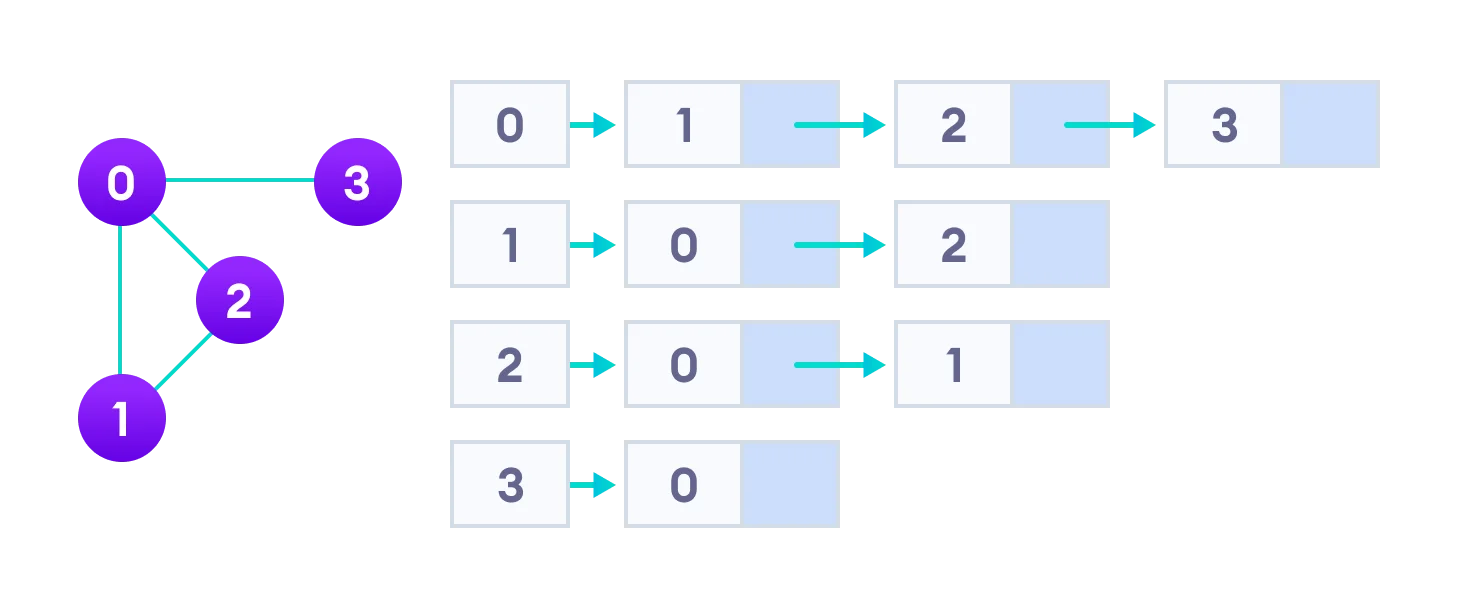

Here, 0, 1, 2, 3 are the vertices and each of them forms a linked list with all of its adjacent vertices. For instance, vertex 1 has two adjacent vertices 0 and 2. Therefore, 1 is linked with 0 and 2 in the figure above.

Pros of Adjacency List
- An adjacency list is efficient in terms of storage because we only need to store the values for the edges. For a sparse graph with millions of vertices and edges, this can mean a lot of saved space.

Cons of Adjacency List
- Finding the adjacent list is not quicker than the adjacency matrix because all the connected nodes must be first explored to find them.

# Adjacency Matrix Implementation 

In [11]:
# Adjacency Matrix representation in Python


class Graph(object):

    # Initialize the matrix
    def __init__(self, size):
        self.adjMatrix = []
        for i in range(size):
            self.adjMatrix.append([0 for i in range(size)])
            
        # rows, cols = (size, size)
        # self.adjMatrix = [[0 for i in range(cols) for j in range(rows)]]
        self.size = size

    # Add edges
    def add_edge(self, v1, v2):
        if v1 == v2:
            print("Same vertex %d and %d" % (v1, v2))
        self.adjMatrix[v1][v2] = 1
        self.adjMatrix[v2][v1] = 1

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v1] = 0

    def __len__(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print(val, end=" "),
            print("\n")


def main():
    g = Graph(4)
    g.add_edge(0, 1)
    g.add_edge(0, 2)
    g.add_edge(0, 3)
    g.add_edge(1, 2)
    g.add_edge(2, 3)

    g.print_matrix()


if __name__ == '__main__':
    main()

0 1 1 1 

1 0 1 0 

1 1 0 1 

1 0 1 0 



# Adjacency List Implementation

In [10]:
# Adjascency List representation in Python


class AdjNode:
    def __init__(self, value):
        self.vertex = value
        self.next = None


class Graph:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V

    # Add edges
    def add_edge(self, s, d):
        node = AdjNode(d)
        node.next = self.graph[s]
        self.graph[s] = node

        node = AdjNode(s)
        node.next = self.graph[d]
        self.graph[d] = node

    # Print the graph
    def print_agraph(self):
        for i in range(self.V):
            print("Vertex " + str(i) + ":", end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")


if __name__ == "__main__":
    V = 4

    # Create graph and edges
    graph = Graph(V)
    graph.add_edge(0, 1)
    graph.add_edge(0, 2)
    graph.add_edge(0, 3)
    graph.add_edge(1, 2)

    graph.print_agraph()

Vertex 0: -> 3 -> 2 -> 1 

Vertex 1: -> 2 -> 0 

Vertex 2: -> 1 -> 0 

Vertex 3: -> 0 

